   # Applied Economic Analysis: Big Mac Index 

|Name|examnr.|
|----|-------|
|Layson Staats|984185|
|Bram Hendriks|660007|

## Research-Questions

    • Based on the Big Mac Index, how are several currencies valued compared to the American Dollar?
    • Sensitivity Analysis: In which way does the alternative Big Mac Index, adding average wage as component, differs from the 'normal' Big Mac Index?
    • Choosing other goods for creating an index, how does these indexes differ from the Big Mac Index?
    • Bundling all goods, does this basket of goods differs from the Big Mac Index?   

## Introduction / Motivation

#### The Importance of Purchasing Power Parity 
Purchasing Power Parity (PPP) compares the currencies of two countries through a basket of goods. PPP implies that when the price of the basket of goods is the same in both countries, the two currencies of those countries are in equilibrium. So, the exchange rate of the currency of country X to the currency of Country Y is equal to the cost of good A in the currency of Country X divided by the cost of good A in the currency of Country Y.
So, to clarify this, the formula to calculate PPP: 
$ExR = Ax/ Ay$

PPP is important because it enables us to compare prices across countries.
PPP provides insight on the potential overvaluation or undervaluation of a nation’s currency. This is important because currencies that are over or undervalued according to PPP are likely to correct over time, leading to potential economic impacts and long-term fluctuations in the exchange rate. [(Impact of PPP)](https://bizfluent.com/info-8425677-importance-purchasing-power-parity.html)

#### The Big Mac Index
One would expect people are able to buy the same amount of goods, with a certain amount of money. In other words, the purchasing power is equal among people living in different countries, otherwise the currency would appreciate / depreciate to the level the latter holds. To test whether this may be true, the best way is to compare the costs of buying a basket of goods across the countries and specific currencies. However, this is not that simple as it sounds, there are either lot of cultural differences or missing data that makes the comparison hard. For this reason, the Big Mac Index was introduced by [The Economist](https://www.economist.com/news/2019/01/10/the-big-mac-index). 
The Big Mac Index is a variant to calculate the purchasing power parity using the price of a McDonald's Big Mac as the benchmark. The index, created in 1986, takes its name from the Big Mac, a hamburger sold at McDonald's restaurants. So, when the exchange rate between two currencies changes, the price that consumers in a specific nation have to pay for a Big Mac will be affected. 
In the [Video](https://www.youtube.com/watch?v=_vCK6QZTVlc) below, you can see a calculation example to better understand the Big Mac Index.

## Method/Planned Approach
For each subquestion we will briefly describe how we try to answer it.

**Based on the Big Mac Index, how are several currencies valued compared to the American Dollar?** 
  With help of datasources we figure out what the local prices of the Big Macs are in several countries. To make them comparable to each other, we convert all the prices to one single currency; the American Dollar. The valuation of each currency will be calculated relative to the US currency, by using the US Big Mac price. Theoretically, the dollar prices of each country's Big Mac should be equal which results in a over-/undervaluation of the particular currency to the dollar. Empirically, this rarely occurs, which results in an over-/undervaluation of the currency. 

**Sensitivity Analysis: In which way does the alternative Big Mac Index, adding average wage as component, differs         from the 'normal' Big Mac Index?**
We will test the purchasing power in an other way; the alternative Big Mac Index. For this index, we add the component average wage and we calculate how many Big Macs can be bought by one hour worked. After this, we compare the results with the results of the normal Big Mac Index. We try to show graphically the relationship between the normal- and alternative Big Mac Index. 

**Choosing other goods for creating an index, how does these indexes differ from the Big Mac Index?**
  We will use 5 different goods than the Big Mac to test whether the outcomes given by the Big Mac Index are similar to the self made indexes of each of these 5 goods. For every specific index, we motivate the selection of these goods and discuss the detailed approach for calculating the over-/undervaluation of each currency relative to the US Dollar. It is also important to point out the assumptions and limitations that we made.

**Bundling all goods, does this basket of goods differs from the Big Mac Index?**
  One expect that the cost of basket of goods is similar across countries. However, as we told earlier, defining a basket of goods may be hard. In our assignment, we use 5 different goods combining with the Big Mac to create our own basket of goods to compare the purchasing power across the countries. After this, it is interesting to compare these results with the results gained by the calculation of the Big Mac Index. 





## Descriptive Statistics

#### Gini coefficient
There is inequality among countries, as well as within countries specifically. The Gini coefficient is a measure of statistical dispersion intended to represent the income or wealth distribution of a residents living in the same nation, and is a measurement of inequality. More information about the Gini coeffecient can be found clicking on this [link](https://www.bbc.com/news/blogs-magazine-monitor-31847943). The Purchusing Power Parity suggests that the currency corrects for the inequality among countries, resulting in buying one specific good, costs similar in those countries. Therefore it may be useful to take a look at the Gini coefficient and find out, later in the research LINK, the relation between the Gini coeffecient and gross domestic product (GDP) per capita. 

The data is retrieved from the [Worldbank](https://data.worldbank.org/indicator/SI.POV.GINI), which contains the Gini coeffecient of last years for several countries. We choose to focus only at the most recent years, because other years may give a strong baised view on the current situation in the country. This data is imported, after which the descriptive statistics of the Gini coefficient can be given. 

In [114]:
# Importing the libraries
import pandas as pd
import numpy as np
import pymc3 as pm
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats, optimize
import random
import wbdata as wb

plt.style.use('seaborn')
%matplotlib inline

In [115]:
# Importing the data
df_Ginicoefficient = pd.read_csv('ProjectData/Ginicoefficient Worldbank.csv', sep = ';')

# Subtracking Descriptive Statistics
df_Ginicoefficient.describe()

,2014,2015,2016,2017
count,70.000000,66.000000,28.000000,2.000000
mean,36.391429,36.522727,39.010714,37.700000
std,8.468591,8.264489,8.029683,0.424264
min,24.000000,25.400000,25.000000,37.400000
25%,29.375000,30.425000,32.475000,37.550000
50%,34.950000,34.800000,40.750000,37.700000
75%,41.350000,41.375000,44.700000,37.850000
max,63.000000,59.100000,50.800000,38.000000


As can be seen in the table above, not all countries does have data about their Gini coefficient every year. In 2014, there was only data available of 20 countries, in 2015 of 66 countries (which may include countries already given in 2014) and so on. Hence, not all countries does have a Gini coefficient reported in these years. The means are all in the range between 35 and 40%, which means that the richest 1% of people living in the countries, on average, earns mamixal 35-40% of the national income. However, there is a large inequality across countries as well, given by the large difference in the min and max rates. 

To make it more clear, countries with no given Gini coefficient are removed. As the most recent coefficient reflects the country's situation the best, it is good to focus on the last given Gini coefficient, independent the number of Gini coefficients given in that four year. 

In [116]:
# Drop irrelevant columns
def get_data_into_shape(df):
    df.drop(['Indicator Name',
             'Indicator Code',
             'Country Code',
             ],inplace=True,axis=1)
    df.drop(df.index[[0]], inplace=True) 
    return df
df_Gini = get_data_into_shape(df_Ginicoefficient)

# Select last 'real' given Gini coefficient
df_last_Ginicoefficient = df_Ginicoefficient.groupby(np.where(df_Ginicoefficient.columns == 'Country Name', 'Country Name', 'Recent Gini coefficient'), axis=1).last()
df_Recent_Gini_Coefficient = df_last_Ginicoefficient[~df_last_Ginicoefficient['Recent Gini coefficient'].isnull()]
df_Recent_Gini_Coefficient

,Country Name,Recent Gini coefficient
7,Argentina,42.4
8,Armenia,32.5
12,Austria,30.5
15,Belgium,27.7
16,Benin,47.8
17,Burkina Faso,35.3
18,Bangladesh,32.4
19,Bulgaria,37.4
22,Bosnia and Herzegovina,32.7
23,Belarus,27.0


In [117]:
df_Recent_Gini_Coefficient.describe()

,Recent Gini coefficient
count,93.000000
mean,37.130108
std,8.173097
min,25.000000
25%,31.800000
50%,35.600000
75%,41.900000
max,63.000000


The tables above shows the most recent Gini coefficients of countries, which had data about that particular coefficient. In total, there were 93 countries with information about inequality within their country. The average equals 37.1%. The tables cofirm the idea there is ineqaulity across countries on a global scale, give the min- and max values.

#### Exchange Rate
As already said, the exchange rate could be a way for dealing with different purchasing power. Therefore it makes sense to take a brief look at the exchange rate. As the original Big Mac Index focus on the US Dollar, we also choose to shows the exchange rate relative to the Dollar. This implies that given number reflects the amount of that specific currency which is equal to 1 USD. We retrieved the data from the [Worldbank](https://data.worldbank.org/indicator/PA.NUS.FCRF). These data consists too much currencies to show all of them in one figure clearly. We therefore rank-ordered them and divide them in subgroups. These subgroups are graphically shown seperately.

In [118]:
#Importing the data
NominalExchangeRate = pd.read_csv('ProjectData/Exchange rate Worldbank.csv')

# Creating the specific subgroups
NominalExchangeRate1 = NominalExchangeRate[NominalExchangeRate['2017']<5]
NominalExchangeRate2 = NominalExchangeRate.loc[(NominalExchangeRate['2017'] >= 5) & (NominalExchangeRate['2017'] < 10)]
NominalExchangeRate3 = NominalExchangeRate.loc[(NominalExchangeRate['2017'] >= 10) & (NominalExchangeRate['2017'] < 120)]
NominalExchangeRate4 = NominalExchangeRate.loc[(NominalExchangeRate['2017'] >= 120) & (NominalExchangeRate['2017'] < 2500)]
NominalExchangeRate5 = NominalExchangeRate[NominalExchangeRate['2017'] >= 2500]

# Data inspection
NominalExchangeRate.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Aruba,ABW,"Official exchange rate (LCU per US$, period av...",PA.NUS.FCRF,NaN,NaN,NaN,NaN,NaN,NaN,...,1.790000,1.790000,1.790000,1.790000,1.790000,1.790000,1.790000,1.790000,1.790000,1.790000
1,Afghanistan,AFG,"Official exchange rate (LCU per US$, period av...",PA.NUS.FCRF,1.719656e+01,1.719656e+01,1.719656e+01,3.510964e+01,3.869226e+01,3.869226e+01,...,50.249615,50.325000,46.452461,46.747008,50.921400,55.377500,57.247500,61.143462,67.866086,68.026904
2,Angola,AGO,"Official exchange rate (LCU per US$, period av...",PA.NUS.FCRF,2.870000e-08,2.870000e-08,2.870000e-08,2.880000e-08,2.880000e-08,2.880000e-08,...,75.033354,79.328167,91.905720,93.934750,95.467955,96.518279,98.302417,120.060702,163.656434,165.915951
3,Albania,ALB,"Official exchange rate (LCU per US$, period av...",PA.NUS.FCRF,NaN,NaN,NaN,NaN,NaN,NaN,...,83.894604,94.978120,103.936443,100.894955,108.184645,105.668673,105.479234,125.960830,124.140872,119.099667
4,Andorra,AND,"Official exchange rate (LCU per US$, period av...",PA.NUS.FCRF,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [119]:
# Importing the data
NominalExchangeRate = pd.read_csv("data/Worldbank exchange rate 1.csv", engine = 'python')

# Dropping columns
NominalExchangeRate.drop(NominalExchangeRate.columns[1:57], axis=1, inplace=True)

# Showing the most recent exchange rate
df_Last_Exchange_Rate = NominalExchangeRate.groupby(np.where(NominalExchangeRate.columns == 'Country Name', 'Country Name', 'Recent Exchange Rate'), axis=1).last()
df_Recent_Exchange_Rate = df_Last_Exchange_Rate[~df_Last_Exchange_Rate['Recent Exchange Rate'].isnull()]
df_Recent_Exchange_Rate['Country Name'] = df_Recent_Exchange_Rate['Country Name'].astype(str)

# Round variables
decimal_exchange_rate = 3
df_Recent_Exchange_Rate['Recent Exchange Rate'] = df_Recent_Exchange_Rate['Recent Exchange Rate'] .apply(lambda x: round(x, decimal_exchange_rate))

df_Recent_Exchange_Rate

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Country Name,Recent Exchange Rate
0,Aruba,1.790
1,Afghanistan,68.027
2,Angola,165.916
3,Albania,119.100
6,United Arab Emirates,3.672
7,Argentina,16.563
8,Armenia,482.716
10,Antigua and Barbuda,2.700
11,Australia,1.305
12,Austria,0.904


From the tables above, one may notice that in the table the exchange rates between 1960 and 2010 are given. If there is, for any reason, no data available for one year for a specific country, this cell equals 'Nan'. For later purpose, it is useful to obtain the most recent exchange rate. The second table reflects this rates. The numbers are rouned to three decimals.

Below, graphs for each subgroup are given.

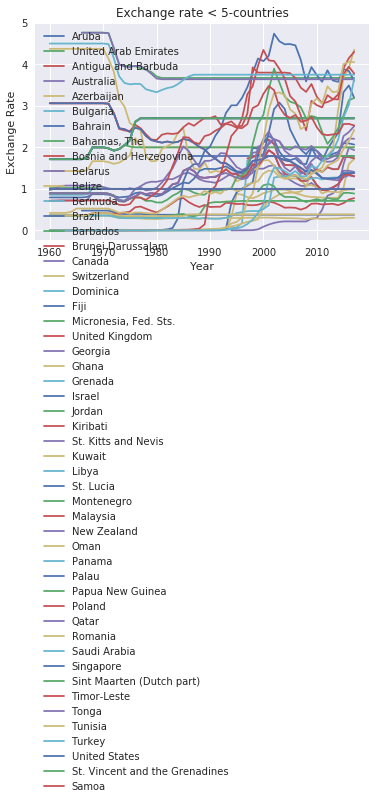

In [120]:
# Dropping outliers
NominalExchangeRateTable1 = NominalExchangeRate1.drop([64,209,210], axis=0)

# Showing subgroup 1 graphically
years = [c for c in NominalExchangeRateTable1.columns if isinstance(c, int) or c.isdigit()]

for idx, er in NominalExchangeRateTable1.iterrows():

    exchange_rates = []

    for year in years:
        exchange_rates.append(er[year])

    plt.plot([int(y) for y in years], exchange_rates, label=er['Country Name'])


plt.title('Exchange rate < 5-countries')
plt.xlabel('Year')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()

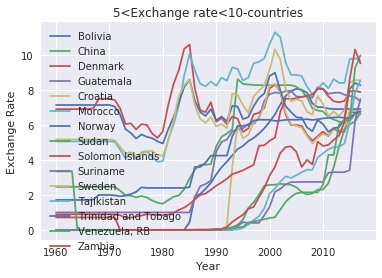

In [121]:
# Showing subgroup 2 graphically
years = [c for c in NominalExchangeRate2.columns if isinstance(c, int) or c.isdigit()]

for idx, er in NominalExchangeRate2.iterrows():

    exchange_rates = []

    for year in years:
        exchange_rates.append(er[year])

    plt.plot([int(y) for y in years], exchange_rates, label=er['Country Name'])


plt.title('5<Exchange rate<10-countries')
plt.xlabel('Year')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()

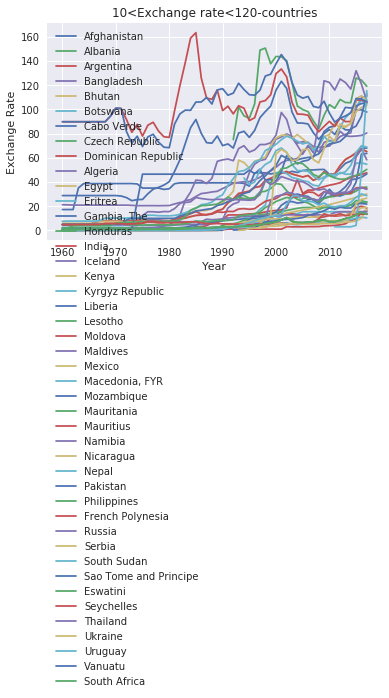

In [122]:
# Dropping outliers
NominalExchangeRateTable3 = NominalExchangeRate3.drop([117], axis=0)

# Showing subgroup 3 graphically
years = [c for c in NominalExchangeRateTable3.columns if isinstance(c, int) or c.isdigit()]

for idx, er in NominalExchangeRateTable3.iterrows():

    exchange_rates = []

    for year in years:
        exchange_rates.append(er[year])

    plt.plot([int(y) for y in years], exchange_rates, label=er['Country Name'])

plt.title('10<Exchange rate<120-countries')
plt.xlabel('Year')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()

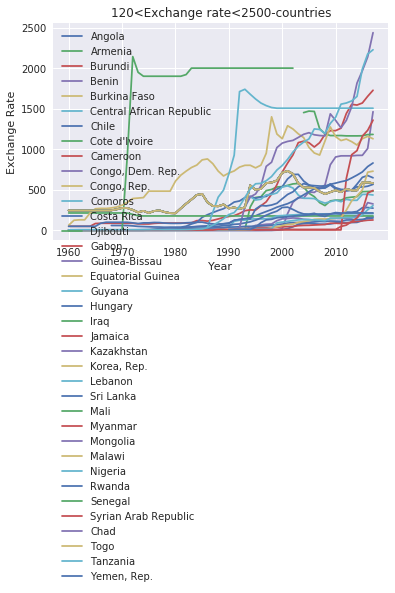

In [123]:
# Showing subgroup 4 graphically
years = [c for c in NominalExchangeRate4.columns if isinstance(c, int) or c.isdigit()]

for idx, er in NominalExchangeRate4.iterrows():

    exchange_rates = []

    for year in years:
        exchange_rates.append(er[year])

    plt.plot([int(y) for y in years], exchange_rates, label=er['Country Name'])


plt.title('120<Exchange rate<2500-countries')
plt.xlabel('Year')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()

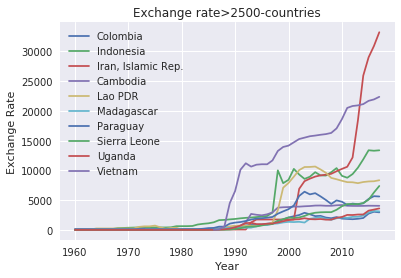

In [124]:
# Showing subgroup 5 graphically
years = [c for c in NominalExchangeRate5.columns if isinstance(c, int) or c.isdigit()]

for idx, er in NominalExchangeRate5.iterrows():

    exchange_rates = []

    for year in years:
        exchange_rates.append(er[year])

    plt.plot([int(y) for y in years], exchange_rates, label=er['Country Name'])

plt.title('Exchange rate>2500-countries')
plt.xlabel('Year')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()

#### Gross Domestic Product per capita 
Another key aspect of the purchasing power is the GDP per capita. It is an important component of economic performance and a useful unit to make cross-country comparisons of average living standards and economic wellbeing. However, GDP per capita is not a measure of personal income and using it for cross-country comparisons also has some known weaknesses. Because when there a lot of millionaires the GDP and therefore the GDP per capita of a country will be higher, but this does not say anything about the personal incomes of the population of the country. More information can be found [here](https://www.focus-economics.com/economic-indicator/gdp-per-capita).

We retrieved the data from the [Worldbank](https://data.worldbank.org/indicator/NY.GDP.PCAP.CD). This data consist of GDP per capita in the period 1960-2017. It is interesting to look after the average annual growth factor, which is calculated in a few steps. Because some countries do not have information of data about their GDP in either 1960 or 2017 these countries are not included in the average annual growth factor calculation. This is the reason why they are not included in the table showing these specific growth rates. The numbers are rounded to 2 decimals. 

In [125]:
# Importing the data
df_GDPpc = pd.read_csv('ProjectData/GDP per capita Worldbank.csv', engine = 'python')

# Adding columns
def get_data_into_shape(df):

    df.drop(df.index[[0]], inplace=True) 
    df['difference']=df['2017'] - df['1960']
    df['change'] = ((df_GDPpc['2017']) - df_GDPpc['1960'])/df_GDPpc['1960']
    df['change_percent'] = ((df_GDPpc['2017']) - df_GDPpc['1960'])/df_GDPpc['1960']*100
    df['growth_factor'] = df['change']**(1/57)
    df['growth_factor percentage'] = (df['growth_factor'] - 1) * 100
    return df
df_GDPpc = get_data_into_shape(df_GDPpc)

# Round columns
decimals = 2
df_GDPpc['growth_factor'] = df_GDPpc['growth_factor'] .apply(lambda x: round(x, decimals))
df_GDPpc['growth_factor percentage'] = df_GDPpc['growth_factor percentage'] .apply(lambda x: round(x, decimals))
df_GDPpc['change'] = df_GDPpc['change'] .apply(lambda x: round(x, decimals))
df_GDPpc['difference'] = df_GDPpc['difference'] .apply(lambda x: round(x, decimals))
df_GDPpc['change_percent'] = df_GDPpc['change_percent'] .apply(lambda x: round(x, decimals))

# Show table
df_GDPpc.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,difference,change,change_percent,growth_factor,growth_factor percentage
1,Afghanistan,AFG,GDP per capita (current US$),NY.GDP.PCAP.CD,59.777327,59.878153,58.492874,78.782758,82.208444,101.290471,...,638.612543,629.345250,569.577923,561.778746,585.850064,526.07,8.8,880.05,1.04,3.89
2,Angola,AGO,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,4804.633826,4707.578098,3683.552607,3308.772828,4170.312280,NaN,NaN,NaN,NaN,NaN
3,Albania,ALB,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,4413.081697,4578.666728,3952.830781,4131.872341,4537.862492,NaN,NaN,NaN,NaN,NaN
4,Andorra,AND,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,40619.711300,42294.994730,36038.267600,37231.815670,39146.548840,NaN,NaN,NaN,NaN,NaN
5,Arab World,ARB,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,7508.573301,7452.814677,6413.377161,6151.180927,6251.141575,NaN,NaN,NaN,NaN,NaN


In [126]:
# Delete countries with no growth factor
df_GDPpc_last = df_GDPpc[~df_GDPpc['growth_factor percentage'].isnull()]

# Show growth factor per country
df_GDPpc_last.iloc[:,[0] + [-1]]

,Country Name,growth_factor percentage
1,Afghanistan,3.89
11,Australia,6.07
12,Austria,7.09
14,Burundi,2.25
15,Belgium,6.33
16,Benin,3.70
18,Bangladesh,5.00
21,"Bahamas, The",5.29
24,Belize,4.88
26,Bolivia,5.51


In [127]:
# Show descriptive statistics growth factor
print(df_GDPpc_last['growth_factor percentage'].describe())

count    123.000000
mean       5.550325
std        1.689893
min        0.130000
25%        4.825000
50%        5.740000
75%        6.570000
max        9.610000
Name: growth_factor percentage, dtype: float64


As can be seen above 123 countries did have data about the GDP per capita in both years (1960 and 2017). As we can see from the descriptive statistics, the average annual growth rate equals 5.55%. However there is a great inequality between countries which can be derived from the standard deviation of 1.69%. 

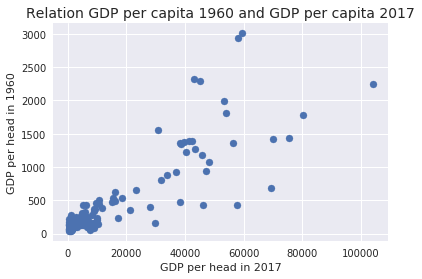

In [128]:
# Show graphically relation between the variables
plt.title('Relation GDP per capita 1960 and GDP per capita 2017', fontsize=14)
plt.scatter( df_GDPpc['2017'], df_GDPpc['1960'])
plt.ylabel('GDP per head in 1960')
plt.xlabel('GDP per head in 2017')
plt.show()

It could be interesting to find whether there is a relation between the GDP per head in 1960 and the GDP per head in 2017. As can be seen in the graph above there is a positive relationship, which suggests that rich countries 1960 did maintain their position, their worldwide position became even larger.

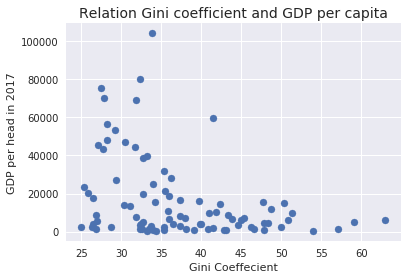

In [129]:
# Merge dataframes
df_merge_Gini_GDPpc = pd.merge(df_Recent_Gini_Coefficient, df_GDPpc, on=['Country Name'], how='inner')

# Show graphically relation between the variables
plt.title('Relation Gini coefficient and GDP per capita', fontsize=14)
plt.scatter(df_merge_Gini_GDPpc['Recent Gini coefficient'], df_merge_Gini_GDPpc['2017'])
plt.xlabel('Gini Coeffecient')
plt.ylabel('GDP per head in 2017')
plt.show()

Another interesting topic is to test whether there is a relation between the nation's GDP per capita in 2017 and the Gini Coefficient. In this graph, we see a clear negative relationship between the variables. This suggests that a relative low GDP per head increases the chance of having a larger Gini Coefficient. 

##  Big Mac Index
This section is divided by two parts. In the first part, we focus on the original Big Mac Index. In the second part, an alternative Big Mac Index is introduced, which can be used as a sensitivity analysis.

#### Original Big Mac Index
**Motivation:** It is hard to compare purchasing power, because it contains several elements, which may differ across countries. Purchasing power parity is based on the costs of a basket of goods. However, a basket of goods is not well-defined. In this respect, the Big Mac can be a substitute. The Big Mac, after all, consists of two key elements: it is <u>available to a common specification in many countries</u> and the <u>price depends, to some extent, on local economic characteristics</u>. The Big Mac Index is widely used, and that is one of the main reasons the main focus is on this index by looking at the valuation of the currencies.

**Data Sources":** There is [GitHub-page](https://github.com/TheEconomist/big-mac-data), that consists of all necessary data. We use it to retrieve to local currency price for buying a big mac in a specific country. To make sure that importing of the data went well, we first downloaded the file on our own Python server, instead of using data straight away from the GitHub-page. This lowers the probability of any mistakes.

**Approach:** First of all, we need to import the data. As it is important, for later uses, to have similar variable names, we renamed some of the variables. In addition to it, some columns are not usefull for our research, and therefore are dropped. To calculate the prices in dollar, the Big Mac- and Recent Exchange Rate-Dataframe are merged and after that the dollarprice could be calculated. To find out whether a specific currency is over- or undervaluated to the US Dollar, we need to compare the Dollarprice of a Big Mac of one country by buying a Big Mac in the United States. The necesarry columns are created therefore.
The formula of over-/undervaluation of one currency to the USD is given by $Over-/undervaluation. local. currency = (localprice .converted.to.USD − USprice)(USprice)×100 $

This formula is also used in other parts.

*Note:* At importing data, Python may see data in another type. To be sure, we convert sometimes columns to either strings or numeric throughout the whole research. 

**Assumptions/Limitations:** The burger methodology has, unfortunately, some limitations. In many countries, eating a Big Mac is seen as a luxury good. It is relatively expensive in comparison to eating at a local restaurant. Therefore, the demand of the Big Mac is in many countries not as large as the United States. Social status of eating a Big Mac, what proportion of sales might be to local taxes, levels of competition, and import duties on some items may not be representative of the country's economy as a whole. Furthermore, there is no theoretical reason why non-tradable products and services should be equal in different countries: this is the reason for PPPs being different from market exchange rates over time. 

In [130]:
# Importing the data
df_bigmac = pd.read_csv("ProjectData/Data Big Mac Prices.csv", engine = 'python')

# Rename variables
# Dropping columns
def get_data_into_shape(df):
    df = df.rename({
        'iso_a3': 'Country Code',
        'local_price': 'Local Price Big Mac',
        'Country' : 'Country Name'
         }, axis='columns')
    df.drop(['dollar_ppp',
             'GDP_dollar',
             'dollar_valuation',
             'euro_valuation',
             'sterling_valuation',
             'yen_valuation',
             'euro_adj_valuation',
             'sterling_adj_valuation',
             'dollar_ex',
             'dollar_price',
             'yen_adj_valuation',
             'yuan_adj_valuation',
             'yuan_valuation',
             'currency_code',
             'dollar_adj_valuation'],inplace=True,axis=1)
    df.drop(df.index[[0]], inplace=True)

    return df
df_bigmac = get_data_into_shape(df_bigmac)

# Convert column to string
df_bigmac['Country Name'] = df_bigmac['Country Name'].astype(str)

# Merge dataframes
df_merge_exchangerate_bigmac = pd.merge(df_bigmac, df_Recent_Exchange_Rate, on=['Country Name'], how='inner')

# Creating columns
df_merge_exchangerate_bigmac['Dollarprice Big Mac'] = df_merge_exchangerate_bigmac['Local Price Big Mac'] / df_merge_exchangerate_bigmac['Recent Exchange Rate']
df_merge_exchangerate_bigmac['DollarPrice USA'] = df_merge_exchangerate_bigmac[df_merge_exchangerate_bigmac["Country Code"] == "USA"]["Local Price Big Mac"].values[0]
df_merge_exchangerate_bigmac['Over-/undervaluation Big Mac'] = (df_merge_exchangerate_bigmac['Dollarprice Big Mac'] - df_merge_exchangerate_bigmac['DollarPrice USA'])/df_merge_exchangerate_bigmac[df_merge_exchangerate_bigmac["Country Code"] == "USA"]["Dollarprice Big Mac"].values[0] *100

# Convert column to numeric 
df_merge_exchangerate_bigmac['Dollarprice Big Mac'] = df_merge_exchangerate_bigmac['Dollarprice Big Mac'].convert_objects(convert_numeric=True)
df_merge_exchangerate_bigmac['DollarPrice USA'] = df_merge_exchangerate_bigmac['DollarPrice USA'].convert_objects(convert_numeric=True)

# Creating column
df_merge_exchangerate_bigmac['Over-/undervaluation Big Mac'] = (df_merge_exchangerate_bigmac['Dollarprice Big Mac'] - df_merge_exchangerate_bigmac['DollarPrice USA'])/df_merge_exchangerate_bigmac[df_merge_exchangerate_bigmac["Country Code"] == "USA"]["Dollarprice Big Mac"].values[0] *100

# Round variables
decimals = 2
df_merge_exchangerate_bigmac['Dollarprice Big Mac'] = df_merge_exchangerate_bigmac['Dollarprice Big Mac']  .apply(lambda x: round(x, decimals))
df_merge_exchangerate_bigmac['Over-/undervaluation Big Mac'] = df_merge_exchangerate_bigmac['Over-/undervaluation Big Mac'] .apply(lambda x: round(x, decimals))

decimal_exchange_rate = 3
df_merge_exchangerate_bigmac['Recent Exchange Rate'] = df_merge_exchangerate_bigmac['Recent Exchange Rate'] .apply(lambda x: round(x, decimal_exchange_rate))


df_merge_exchangerate_bigmac.iloc[:,:]

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:44: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:45: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


,Country Name,Country Code,Local Price Big Mac,Recent Exchange Rate,Dollarprice Big Mac,DollarPrice USA,Over-/undervaluation Big Mac
0,Argentina,ARG,75.00,16.563,4.53,5.51,-17.82
1,Australia,AUS,6.05,1.305,4.64,5.51,-15.86
2,Austria,AUT,3.40,0.904,3.76,5.51,-31.74
3,Azerbaijan,AZE,3.95,1.721,2.30,5.51,-58.35
4,Bahrain,BHR,1.20,0.376,3.19,5.51,-42.08
5,Belgium,BEL,4.10,0.904,4.54,5.51,-17.69
6,Brazil,BRA,16.90,3.191,5.30,5.51,-3.88
7,Canada,CAN,6.65,1.298,5.12,5.51,-7.02
8,Switzerland,CHE,6.50,0.985,6.60,5.51,19.76
9,Chile,CHL,2640.00,648.834,4.07,5.51,-26.16


In the table above, the over-/undervalation for each currency is given. Admittedly, this is not correctly true, because several Euro-countries are included, which do have a different valuation compared to the USD. There are only two countries that do have an overvaluation, namely Switzerland and Sweden; the other countries do have an undervaluation to the USD. Undervaluation (Overvaluation) implies that the local currency is selling for a price presumed to be below (above) the true intrinsic value. Following the results above, most currencies are undervalued, implying that in an 'equal' situation one should get more USD in exchange for their local currency.

### Sensitivity Analysis: Alternative Big Mac Index
**Motivation:** Because the original Big Mac Index does not tell something about the quantity of Big Mac a person could buy. Hypothetically, the South African Big Mac dollar price equals to 1 USD, while in the Netherlands it equals to 5 USD. In the original Big Mac Index the South African currency is 5 times undervalued compared to the Dutch currency. However, if the average wage per hour is 10 times higher in the Netherlands than in South Africa, the Dutch person could still buy 2 times more Big Macs. Therefore, the original Big Mac Index does not tell everything. It is also important to look at the relation between average wage and the Big Mac price to obtain the 'real' purchasing power. 

**Data Sources:** We retrieved the data of the average wages from the [Worldbank](https://data.worldbank.org/indicator/SL.EMP.WORK.ZS?view=chart). 

**Approach:** After importing the data we create columns with the last given average wage of each country. This average wage will be used for calculating how many Big Macs you could buy for one hour worked. As the average wage is given by yearly number, we first have to make sure that this is converted to hourly numbers. For knowing the potential how many Big Macs one can buy in one hour, we need to merge the average wage- and the Big Mac dataframe. In this way we are able to divide the hourly average wage by the Big Mac Dollar price for each country. At last, we compare this number with the US outcome.

**Assumptions/Limitations:** For calculating the hourly average wage, we made the assumption that an average person works 40 hours per week, 52 weeks per year (= 2080 hours in total). Furthermore it is important that we don't focus anymore on the over-/undervaluation of one currency, because the average wage is another component of the purchasing power which does not fully depend on the relative currency position. 


In [131]:
# Importing the data
df_Average_Wage = pd.read_csv("ProjectData/Average Wage WorldBank.csv", engine = 'python')

# Creating column with last given average wage
df_last_Average_Wage = df_Average_Wage.groupby(np.where(df_Average_Wage.columns == 'Country Name', 'Country Name', 'Recent Average Wage'), axis=1).last()
df_Recent_Average_Wage = df_last_Average_Wage[~df_last_Average_Wage['Recent Average Wage'].isnull()]
df_Recent_Average_Wage['Country Name'] = df_Recent_Average_Wage['Country Name'].astype(str)

# Convert column to numeric
df_Recent_Average_Wage['Recent Average Wage'] = df_Recent_Average_Wage['Recent Average Wage'].convert_objects(convert_numeric=True)
df_Recent_Average_Wage['Average Wage per hour'] = df_Recent_Average_Wage['Recent Average Wage'] / 2080

# Merge dataframes
df_merge_BMI_Average_Wage = pd.merge(df_Recent_Average_Wage, df_merge_exchangerate_bigmac, on=['Country Name'], how='inner')

# Drop columns
def get_data_into_shape(df):
    df.drop(['Country Code',
             'Local Price Big Mac',
             'Recent Exchange Rate',
             'DollarPrice USA',
             'Over-/undervaluation Big Mac',
             ],inplace=True,axis=1)
    return df
df_merge_BMI_Average_Wage = get_data_into_shape(df_merge_BMI_Average_Wage)

# Converting columns to numeric
df_merge_BMI_Average_Wage['Dollarprice Big Mac'] = df_merge_BMI_Average_Wage['Dollarprice Big Mac'].convert_objects(convert_numeric=True)
df_merge_BMI_Average_Wage['Recent Average Wage'] = df_merge_BMI_Average_Wage['Recent Average Wage'].convert_objects(convert_numeric=True)

# Creating columns
df_merge_BMI_Average_Wage['Max Big Mac per hour'] = df_merge_BMI_Average_Wage['Average Wage per hour'] / df_merge_BMI_Average_Wage['Dollarprice Big Mac']
df_merge_BMI_Average_Wage['Max Quantity USA'] = df_merge_BMI_Average_Wage[df_merge_BMI_Average_Wage["Country Name"] == "United States"]["Max Big Mac per hour"].values[0]
df_merge_BMI_Average_Wage['Relative to USA'] = (df_merge_BMI_Average_Wage['Max Big Mac per hour'] - df_merge_BMI_Average_Wage['Max Quantity USA']) / df_merge_BMI_Average_Wage['Max Quantity USA'] * 100

# Round variables 
decimals1 = 2
df_merge_BMI_Average_Wage['Recent Average Wage'] = df_merge_BMI_Average_Wage['Recent Average Wage']  .apply(lambda x: round(x, decimals1))
df_merge_BMI_Average_Wage['Average Wage per hour'] = df_merge_BMI_Average_Wage['Average Wage per hour'] .apply(lambda x: round(x, decimals1))
df_merge_BMI_Average_Wage['Dollarprice Big Mac'] = df_merge_BMI_Average_Wage['Dollarprice Big Mac'] .apply(lambda x: round(x, decimals1))
df_merge_BMI_Average_Wage['Max Big Mac per hour'] = df_merge_BMI_Average_Wage['Max Big Mac per hour'] .apply(lambda x: round(x, decimals1))
df_merge_BMI_Average_Wage['Max Quantity USA'] = df_merge_BMI_Average_Wage['Max Quantity USA'] .apply(lambda x: round(x, decimals1))
df_merge_BMI_Average_Wage['Relative to USA'] = df_merge_BMI_Average_Wage['Relative to USA'] .apply(lambda x: round(x, decimals1))

# Show table
df_merge_BMI_Average_Wage.iloc[:,:]

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:10: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:28: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:29: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


,Country Name,Recent Average Wage,Average Wage per hour,Dollarprice Big Mac,Max Big Mac per hour,Max Quantity USA,Relative to USA
0,Argentina,10729.86,5.16,4.53,1.14,4.33,-73.67
1,Australia,38859.32,18.68,4.64,4.03,4.33,-6.92
2,Austria,36635.90,17.61,3.76,4.68,4.33,8.30
3,Azerbaijan,2874.76,1.38,2.30,0.60,4.33,-86.11
4,Belgium,33307.82,16.01,4.54,3.53,4.33,-18.46
5,Bahrain,18906.71,9.09,3.19,2.85,4.33,-34.13
6,Brazil,7352.16,3.53,5.30,0.67,4.33,-84.58
7,Canada,34229.19,16.46,5.12,3.21,4.33,-25.69
8,Switzerland,63377.63,30.47,6.60,4.62,4.33,6.73
9,Chile,10860.15,5.22,4.07,1.28,4.33,-70.34


In the table above, one may find the country's purchasing power relative to the United States. Please note that a negative number here means that that particular country is potentially able to buy less Big Macs per hour. A negative number implies that it is negative for the country, because they are not able to buy the same amount of Big Macs, that an American could buy with one hour worked. If the number is positive, the story is the other way around.

We had an idea that the purchasing power number relative to the United States can partly depend on the GDP per capita of each country. As we know, the United States does have one of the highest GDP per capita and there are only a few countries that does have a positive number relative to the US, as can be seen above. Therefore we merged the specific dataframes and try to show their relation graphically. In addition, it may be interesting to look at whether there is a relation between the outcome of the original Big Mac Index and the alternative Big Mac Index.

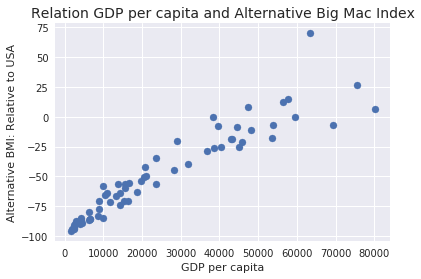

In [132]:
# Merge dataframes
df_merge_GDPpc_relativeBigmac = pd.merge(df_GDPpc, df_merge_BMI_Average_Wage, on=['Country Name'], how='inner')

# Show relation graphically
plt.title('Relation GDP per capita and Alternative Big Mac Index', fontsize=14)
plt.scatter( df_merge_GDPpc_relativeBigmac['2017'], df_merge_GDPpc_relativeBigmac['Relative to USA'])
plt.ylabel('Alternative BMI: Relative to USA')
plt.xlabel('GDP per capita')
plt.show()

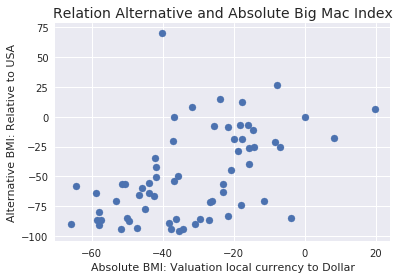

In [133]:
# Merge dataframes
df_merge_absoluteBigMac_relativeBigmac = pd.merge(df_merge_exchangerate_bigmac, df_merge_BMI_Average_Wage, on=['Country Name'], how='inner')

# Show relation graphically
plt.title('Relation Alternative and Absolute Big Mac Index', fontsize=14)
plt.scatter( df_merge_absoluteBigMac_relativeBigmac['Over-/undervaluation Big Mac'], df_merge_absoluteBigMac_relativeBigmac['Relative to USA'])
plt.ylabel('Alternative BMI: Relative to USA')
plt.xlabel('Absolute BMI: Valuation local currency to Dollar')
plt.show()

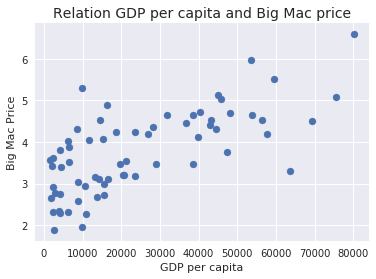

In [134]:
# Merge dataframes
df_merge_GDPpc_BigMacPrice = pd.merge(df_GDPpc, df_merge_BMI_Average_Wage, on=['Country Name'], how='inner')

# Show relation graphically
plt.title('Relation GDP per capita and Big Mac price', fontsize=14)
plt.scatter( df_merge_GDPpc_BigMacPrice['2017'], df_merge_GDPpc_BigMacPrice['Dollarprice Big Mac'])
plt.ylabel('Big Mac Price')
plt.xlabel('GDP per capita')
plt.show()

As we already thought, we did find a positive relation between the Alternative Big Mac Index and the GDP per capita, as can be seen in the first table above. This implies that a higher GDP per capita increases, logically, the quantity Big Macs that could be bought. We noted that the Big Mac prices are somewhat less important in this way, because otherwise the relation would be less strong. The impact of a higher GDP, which normally results in a higher wage per head, influences the number of Big Macs that can be bought more than the Big Mac price does. 

In the second graph, we are able to see a positive relation between the Alternative and Original Big Mac Index. At first sight, this is quite strange, because this implies that a country 'wants' to be his currency overvalued to the USD, because this equals to a higher probability of purchasing power. 
We could think of one major element that could influence that graph; the income per head. One may argue that a higher wage would lead to a higher Alternative Big Mac Index, but also to an increase of the economic performance of a country. The latter could be the case, if the determination of the a country's Big Mac price partly depends on the economic performance of the country. 
Therefore, we try to show the relation between the GDP per capita and Big Mac Index. As can be seen above, there is a postive relation, suggesting that the Big Mac price increases if the country's economic performance improves. 

## Other Applications
In this section we discuss 5 different cases, which may have some similarities to the Big Mac Index. Each case will be discussed separetaly, after which the valuations of the currencies will be compared to those given at the Big Mac Index.

### IKEA's Billy Bookcase
**Motivation:** For other applications, we need to make sure that we do have other goods that may, similar to the Big Mac, tell something about the relative purchasing power. We did some research online and did find a variation; the Ikea's Billy Bookshelf. The Billy Bookshelf Index, however, differs from the Big Mac Index. In this case, it considers durable goods, rather than consumer goods, meaning they aren't purchased as often. The Billy Bookshelf is sold in +/- 40 [countries](https://www.ikea.com/), so the first prerequisite, which implies that it is available to a common specification in many countries, is met. Whether the second prerequisite, price depends on local conditions, is met is questionable.The price of Ikea products depends not primarly on local conditions, because it manufactures [contentinal](https://www.quora.com/Is-ikea-furniture-all-made-in-China).

**Approach:** After importing the data, we merged the dataframes needed. As we noticed in the data, the local currency prices were given. Hence, the dollarprice for a Billy Bookshelf is calculated. Similarly as we did with the Big Mac Index, the over-/undervaluation is calculated, relative to the US dollar.

**Data Sources:** First of all, we made a list of countries in which Ikea sells their bookshelves. For these countries, we searched the domestic price for the Billy Bookshelf with size of 40 x 28 x 202 cm. To be sure we used the right prices, we searched in the domestic language for each country, e.g. the [Spanish version](https://www.ikea.com/es/es/productos/muebles-almacenaje/librerias/billy-librer%C3%ADa-blanco-art-50263838/). We created the list manually, before we imported the data.

**Assumptions / Limitations:** As said in the Motivation-part, it is questionable whether the second prerequisite is fullfilled. The prices does not depend on local conditions, but more on other conditions. Business competition, transport costs, import duties and price wars does influence the price to a larger extent. The question is whether these events just need to be counted in the purchasing power parity, because they do affect the purchasing power. Another drawback is that the Ikea bookshelves are sold less compared to the Big Mac, mainly due to the fact the Billy bookcase can be seen as a durable good.

In [135]:
# Importing the data
df_IKEA = pd.read_csv("ProjectData/Ikea Bookcase Price.csv", engine = 'python')

# Converting to numeric
df_IKEA['Billy Bookcase'] = df_IKEA['Billy Bookcase'].convert_objects(convert_numeric=True)

# Converting to string
df_IKEA['Country Name'] = df_IKEA['Country Name'].astype(str)

# Merge dataframes
df_merge_exchange_IKEA = pd.merge(df_IKEA, df_Recent_Exchange_Rate, on=['Country Name'], how='inner')

# Rename variable
def get_data_into_shape(df):
    df = df.rename({
        'Billy Bookcase':'Billy Bookcase Local Currency',
    }, axis='columns')
    return df
df_merge_exchange_IKEA = get_data_into_shape(df_merge_exchange_IKEA)

# Creating columns
df_merge_exchange_IKEA['Dollarprice IKEA'] = df_merge_exchange_IKEA['Billy Bookcase Local Currency'] / df_merge_exchange_IKEA['Recent Exchange Rate']
df_merge_exchange_IKEA['DollarPrice USA'] = df_merge_exchange_IKEA[df_merge_exchange_IKEA["Country Code"] == "USA"]["Dollarprice IKEA"].values[0]

# Converting to numeric
df_merge_exchange_IKEA['Dollarprice IKEA'] = df_merge_exchange_IKEA['Dollarprice IKEA'].convert_objects(convert_numeric=True)
df_merge_exchange_IKEA['DollarPrice USA'] = df_merge_exchange_IKEA['DollarPrice USA'].convert_objects(convert_numeric=True)

# Creating column
df_merge_exchange_IKEA['Over-/undervaluation IKEA'] = (df_merge_exchange_IKEA['Dollarprice IKEA'] - df_merge_exchange_IKEA['DollarPrice USA'])/df_merge_exchange_IKEA[df_merge_exchange_IKEA["Country Code"] == "USA"]["Dollarprice IKEA"].values[0] *100

# Round columns
decimal_exchange_rate = 3
df_merge_exchange_IKEA['Recent Exchange Rate'] = df_merge_exchange_IKEA['Recent Exchange Rate'] .apply(lambda x: round(x, decimal_exchange_rate))

decimals = 2
df_merge_exchange_IKEA['Dollarprice IKEA'] = df_merge_exchange_IKEA['Dollarprice IKEA'] .apply(lambda x: round(x, decimals))
df_merge_exchange_IKEA['Over-/undervaluation IKEA'] = df_merge_exchange_IKEA['Over-/undervaluation IKEA'] .apply(lambda x: round(x, decimals))


# Show table
df_merge_exchange_IKEA

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:5: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:26: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:27: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


,Country Name,Country Code,Billy Bookcase Local Currency,Recent Exchange Rate,Dollarprice IKEA,DollarPrice USA,Over-/undervaluation IKEA
0,Australia,AUS,50.00,1.305,38.31,49.0,-21.81
1,Austria,AUT,24.99,0.904,27.64,49.0,-43.58
2,Belgium,BEL,29.99,0.904,33.17,49.0,-32.30
3,Bulgaria,BGR,64.89,1.735,37.40,49.0,-23.67
4,Canada,CAN,40.00,1.298,30.82,49.0,-37.11
5,China,CHN,299.00,6.759,44.24,49.0,-9.72
6,Cyprus,CYP,32.98,0.904,36.48,49.0,-25.55
7,Czech Republic,CZE,599.00,23.376,25.62,49.0,-47.70
8,Denmark,DNK,299.00,6.603,45.28,49.0,-7.59
9,Egypt,EGY,101.55,17.783,5.71,49.0,-88.35


### Pepsi's Coke bottle
**Motivation:** At McDonald's, you often get some drinks like coke. So, coke is a complementary good of a Big Mac and therefore a good alternative to calculate the index with this good. The first prerequisite is therefore met, because it is sold worldwide. Pepsi is locally produced, mainly because the flavour culturally differs. This is also results that the manufacturing prices can differ locally. We realize that this manufacturing process for the small part contributes to the Pepsi price compared to the Big Mac. Therefore, we assumed the second prerequisite to hold partly. 

**Approach:** After importing the data, we merged the dataframes needed. As we noticed in the data, the dollar prices were already given. Similarly as we did with the Big Mac Index, the over-/undervaluation is calculated, relative to the US dollar.

**Data Sources:** Pepsi is sold worldwide, especially their Coke variant. Data about the worldwide price could be found [here](https://www.numbeo.com/cost-of-living/country_price_rankings?itemId=6). After making a seperate csv-file, we were able to import the data. 

**Assumptions / Limitations:** As said earlier the local conditions do not affect the price of Pepsi that much. Furthermore, it maybe that there are some import duties for some countries, like Heineken in South-Asian countries. The price may be higher in a specific country if pepsi is not produced over there but imported from another country. As we saw on the link above, most Pepsi products are produces locally, but this does not hold for every country. 


In [136]:
# Importing the data
df_Coke = pd.read_csv(r'ProjectData/Coke pepsi worldwide price.csv', engine = 'python', sep = ';')

# Converting to numeric
df_Coke['Dollar Price Pepsi bottle'] = df_Coke['Dollar Price Pepsi bottle'].convert_objects(convert_numeric=True)

# Converting to string
df_Coke['Country Name'] = df_Coke['Country Name'].astype(str)

# Creating columns
df_Coke['USADollarPrice'] = df_Coke[df_Coke["Country Name"] == "United States"]["Dollar Price Pepsi bottle"].values[0]
df_Coke['Over-/undervaluation Coke'] = (df_Coke['Dollar Price Pepsi bottle'] - df_Coke['USADollarPrice'])/df_Coke[df_Coke["Country Name"] == "United States"]["Dollar Price Pepsi bottle"].values[0] *100

# Round columns
decimals = 2
df_Coke['Over-/undervaluation Coke'] = df_Coke['Over-/undervaluation Coke'] .apply(lambda x: round(x, decimals))

# Show table
df_Coke

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:5: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """


,Country Name,Dollar Price Pepsi bottle,USADollarPrice,Over-/undervaluation Coke
0,Albania,1.08,1.78,-39.33
1,Algeria,0.52,1.78,-70.79
2,Argentina,1.02,1.78,-42.70
3,Armenia,0.63,1.78,-64.61
4,Australia,2.29,1.78,28.65
5,Austria,2.95,1.78,65.73
6,Azerbaijan,0.36,1.78,-79.78
7,Belgium,2.49,1.78,39.89
8,Bosnia And Herzegovina,1.30,1.78,-26.97
9,Brazil,1.17,1.78,-34.27


### Starbucks' Chai Latte
**Motivation:** Searching for other applications of the Big Max, we often found the Starbucks' Chai Latte Index. Same as in the Big Mac Index, this product largely made locally. So, the second prerequisite is met. Therefore it seems a good alternative for the Big Mac Index. In addition, Starbucks operates 28,218 locations worldwide in 80 different countries. This means that this product is sold in many countries as well as currencies. The latter ensures that the first prerequisite is met. 

**Approach:** After importing the data, we merged the dataframes needed. As we noticed in the data, the dollar prices were already given. To be sure, we calculated the local currency price, mainly to look whether there are no errors in the data. Similarly as we did with the Big Mac Index, the over-/undervaluation is calculated, relative to the US dollar.

**Data Sources:** Starbucks sells many items, so we thought it would be optimal to focus on one product, the same as with the Big Mac and Mac Donalds, the Chai Latte. On [this](https://www.valuepenguin.com/countries-where-buying-starbucks-most-and-least-extravagant#nogo) site we did find several countries, with their specific Chai Latte price. In total there were given +/- 30 countries. We were able to directly make a csv-file from it, after it was able to import.

**Assumptions / Limitations:** We assume that everything is bought locally. This may not hold for some coffeebeans which are imported from one central point. In addition, in many countries, drinking a Starbucks Chai Latte is seen as a luxury good. This may result in an unequal distribution of the demand across countries. 

In [137]:
# Importing the data
df_Starbucks = pd.read_csv("ProjectData/Starbucks price worldwide.csv", engine = 'python')

# Merge dataframes
df_merge_exchange_Starbucks= pd.merge(df_Starbucks, df_Recent_Exchange_Rate, on=['Country Name'], how='inner')

# Creating columns
df_merge_exchange_Starbucks['Local Starbucks Price'] = df_merge_exchange_Starbucks['Dollar Starbucks Price'] * df_merge_exchange_Starbucks['Recent Exchange Rate']
df_merge_exchange_Starbucks['DollarPrice USA'] = df_merge_exchange_Starbucks[df_merge_exchange_Starbucks["Country Name"] == "United States"]["Dollar Starbucks Price"].values[0]

# Converting to numeric
df_merge_exchange_Starbucks['Local Starbucks Price'] = df_merge_exchange_Starbucks['Local Starbucks Price'].convert_objects(convert_numeric=True)
df_merge_exchange_Starbucks['DollarPrice USA'] = df_merge_exchange_Starbucks['DollarPrice USA'].convert_objects(convert_numeric=True)

# Creating column
df_merge_exchange_Starbucks['Over-/undervaluation Starbucks'] = (df_merge_exchange_Starbucks['Dollar Starbucks Price'] - df_merge_exchange_Starbucks['DollarPrice USA'])/df_merge_exchange_Starbucks[df_merge_exchange_Starbucks["Country Name"] == "United States"]["Dollar Starbucks Price"].values[0] *100

# Round columns
decimal_exchange_rate = 3
df_merge_exchange_Starbucks['Recent Exchange Rate'] = df_merge_exchange_Starbucks['Recent Exchange Rate'] .apply(lambda x: round(x, decimal_exchange_rate))

decimals = 2
df_merge_exchange_Starbucks['Local Starbucks Price'] = df_merge_exchange_Starbucks['Local Starbucks Price'] .apply(lambda x: round(x, decimals))
df_merge_exchange_Starbucks['Over-/undervaluation Starbucks'] = df_merge_exchange_Starbucks['Over-/undervaluation Starbucks'] .apply(lambda x: round(x, decimals))

# Show table
df_merge_exchange_Starbucks.iloc[:,:]

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:12: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  if sys.path[0] == '':
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:13: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  del sys.path[0]


,Country Name,Dollar Starbucks Price,Recent Exchange Rate,Local Starbucks Price,DollarPrice USA,Over-/undervaluation Starbucks
0,China,5.96,6.759,40.28,4.85,22.89
1,Sweden,5.76,8.549,49.24,4.85,18.76
2,France,5.10,0.904,4.61,4.85,5.15
3,Netherlands,5.07,0.904,4.58,4.85,4.54
4,Austria,4.85,0.904,4.38,4.85,0.00
5,United States,4.85,1.000,4.85,4.85,0.00
6,Germany,4.81,0.904,4.35,4.85,-0.82
7,Czech Republic,4.69,23.376,109.63,4.85,-3.30
8,Ireland,4.50,0.904,4.07,4.85,-7.22
9,Greece,4.50,0.904,4.07,4.85,-7.22


### Pringles' Chips
**Motivation:** We were interested in how the results of the index would differ choosing another "food type". We taught about which products are eaten worldwide and we taught about crisps. We searched for some worldwide data and we figured out that there was some data available from Pringles. After reviewing Pringles we decided to add it into one of our variations of the Big Mac Index. First of all, Pringles are sold to a large number of countries. Therefore, the first prerequisite is met. The second prerequisite is partly met, because there are several factories globally, but each factory itself produces for a large number of countries. Therefore the effect of local conditions would diminish to a large extent. However, we taught it would be important to add some kind of product in our research. 

**Approach:** After importing the data, we merged the dataframes needed. As we noticed in the data, the dollar prices were already given. To be sure, we calculated the local currency price, mainly to look whether there are no errors in the data. Similarly as we did with the Big Mac Index, the over-/undervaluation is calculated, relative to the US dollar.

**Data Sources:** Online, there is a [datalist](http://www.globalbrandprices.com/rankings/Pringles/), containing the price of Pringles Potato Crisps around the world. As we weren't able to save it directly as a csv-file, we did import the data in an indirect way; by making a new list containing all prices and country names.  

**Assumptions / Limitations:** As earlier said, Pringles is produced on a large scale. So, the local conditions are not seen in the local currency price. This implies that the valuation of the currency to the USD may be biased. Similar to some other applications, Pringles may face some market failures, such as import duties. 

In [138]:
# Importing the data
df_Pringles = pd.read_csv("ProjectData/Pringles Price.csv", engine = 'python')

# Merge dataframes
df_merge_exchange_Pringles= pd.merge(df_Pringles, df_Recent_Exchange_Rate, on=['Country Name'], how='inner')

# Creating columns
df_merge_exchange_Pringles['Local Pringles Price'] = df_merge_exchange_Pringles['Dollar Price Pringles'] * df_merge_exchange_Pringles['Recent Exchange Rate']
df_merge_exchange_Pringles['DollarPrice USA'] = df_merge_exchange_Pringles[df_merge_exchange_Pringles["Country Name"] == "United States"]["Dollar Price Pringles"].values[0]

# Converting to numeric
df_merge_exchange_Pringles['Local Pringles Price'] = df_merge_exchange_Pringles['Local Pringles Price'].convert_objects(convert_numeric=True)
df_merge_exchange_Pringles['DollarPrice USA'] = df_merge_exchange_Pringles['DollarPrice USA'].convert_objects(convert_numeric=True)

# Creating column 
df_merge_exchange_Pringles['Over-/undervaluation Pringles'] = (df_merge_exchange_Pringles['Dollar Price Pringles'] - df_merge_exchange_Pringles['DollarPrice USA'])/df_merge_exchange_Pringles[df_merge_exchange_Pringles["Country Name"] == "United States"]["Dollar Price Pringles"].values[0] *100

# Round columns
decimal_exchange_rate = 3
df_merge_exchange_Pringles['Recent Exchange Rate'] = df_merge_exchange_Pringles['Recent Exchange Rate'] .apply(lambda x: round(x, decimal_exchange_rate))

decimals = 2
df_merge_exchange_Pringles['Local Pringles Price'] = df_merge_exchange_Pringles['Local Pringles Price'] .apply(lambda x: round(x, decimals))
df_merge_exchange_Pringles['Over-/undervaluation Pringles'] = df_merge_exchange_Pringles['Over-/undervaluation Pringles'] .apply(lambda x: round(x, decimals))

# Show table
df_merge_exchange_Pringles.iloc[:,:]

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:12: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  if sys.path[0] == '':
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:13: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  del sys.path[0]


,Country Name,Dollar Price Pringles,Recent Exchange Rate,Local Pringles Price,DollarPrice USA,Over-/undervaluation Pringles
0,Argentina,1.33,16.563,22.03,2.46,-45.93
1,Armenia,2.23,482.716,1076.46,2.46,-9.35
2,Australia,3.22,1.305,4.20,2.46,30.89
3,Austria,2.73,0.904,2.47,2.46,10.98
4,Azerbaijan,1.28,1.721,2.20,2.46,-47.97
5,Bahrain,2.11,0.376,0.79,2.46,-14.23
6,Bangladesh,2.45,80.438,197.07,2.46,-0.41
7,Belgium,1.82,0.904,1.65,2.46,-26.02
8,Bosnia and Herzegovina,2.18,1.735,3.78,2.46,-11.38
9,Brazil,4.78,3.191,15.25,2.46,94.31


### Apple's IPhone
**Motivation:** Like in the applications above, we mainly focus on food products. Therefore, we searched for an other type of good. The mobile phone is used by almost everyone, in particular Apple is worldwide known and sold. The first prerequisite is therefore met. As we figured out, the Iphone index already existed, which made it more easy to obtain the data. One thing to note, this is exactly the opposite measurement to that used in the original Big Mac Index. In this case we are measuring the price difference in non-traded goods, so as to try and get an idea of what PPP exchange rates are. As we will discuss in the limitations part, choosing for Apple's Iphone bring some disadvantages with it. 

**Approach:** After importing the data, we merged the dataframes needed. As we noticed in the data, the local currency prices were given. Hence, the dollarprice for a Apple's IPhone is calculated. Similarly as we did with the Big Mac Index, the over-/undervaluation is calculated, relative to the US dollar.

**Data Sources:** We did find a Iphone [datalist](https://iphone-worldwide.com/) online,, which contains the iPhone Xs / 64Gb prices around the world. We copied this data and made a list on our own, to prevent unnecessary errors. We also made the data suitable for importing it in Python.

**Assumptions / Limitations:** Apple's Iphone is produced mainly at one point, so the local currency price largely depends on transportation costs and/or import duties, not on local conditions. One may argue that these costs are normally calculated in the purchasing power, so the effect of it may be negligible. However, this discussion is not relevant for this research. Therefore, we assume that the price is partly based on economic conditions of countries.

In [139]:
# Importing the data
df_IPhone = pd.read_csv("data/IPhone Price.csv", engine = 'python')

# Merge dataframes
df_merge_exchange_IPhone = pd.merge(df_IPhone, df_Recent_Exchange_Rate, on=['Country Name'], how='inner')

# Creating columns
df_merge_exchange_IPhone['Dollarprice IPhone'] = df_merge_exchange_IPhone['Iphone Local Price'] / df_merge_exchange_IPhone['Recent Exchange Rate']
df_merge_exchange_IPhone['DollarPrice USA'] = df_merge_exchange_IPhone[df_merge_exchange_IPhone["Country Name"] == "United States"]['Iphone Local Price'].values[0]

# Converting to numeric
df_merge_exchange_IPhone['Dollarprice IPhone'] = df_merge_exchange_IPhone['Dollarprice IPhone'].convert_objects(convert_numeric=True)
df_merge_exchange_IPhone['DollarPrice USA'] = df_merge_exchange_IPhone['DollarPrice USA'].convert_objects(convert_numeric=True)

# Creating column
df_merge_exchange_IPhone['Over-/undervaluation IPhone'] = (df_merge_exchange_IPhone['Dollarprice IPhone'] - df_merge_exchange_IPhone['DollarPrice USA'])/df_merge_exchange_IPhone[df_merge_exchange_IPhone["Country Name"] == "United States"]["Iphone Local Price"].values[0] *100

# Round columns
decimal_exchange_rate = 3
df_merge_exchange_IPhone['Recent Exchange Rate'] = df_merge_exchange_IPhone['Recent Exchange Rate'] .apply(lambda x: round(x, decimal_exchange_rate))

decimals = 2
df_merge_exchange_IPhone['Dollarprice IPhone'] = df_merge_exchange_IPhone['Dollarprice IPhone'] .apply(lambda x: round(x, decimals))
df_merge_exchange_IPhone['Over-/undervaluation IPhone'] = df_merge_exchange_IPhone['Over-/undervaluation IPhone'] .apply(lambda x: round(x, decimals))

# Show table
df_merge_exchange_IPhone.iloc[:,:]

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:12: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  if sys.path[0] == '':
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:13: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  del sys.path[0]


,Country Name,Iphone Local Price,Recent Exchange Rate,Dollarprice IPhone,DollarPrice USA,Over-/undervaluation IPhone
0,Australia,1629,1.305,1248.28,999,24.95
1,Austria,1149,0.904,1271.02,999,27.23
2,Belgium,1159,0.904,1282.08,999,28.34
3,Brazil,7299,3.191,2287.37,999,128.97
4,Canada,1379,1.298,1062.40,999,6.35
5,China,8699,6.759,1287.02,999,28.83
6,Czech Republic,29990,23.376,1282.94,999,28.42
7,Denmark,8899,6.603,1347.72,999,34.91
8,Finland,1179,0.904,1304.20,999,30.55
9,France,1156,0.904,1278.76,999,28.00


### Over-/undervaluation all goods

For every application, we calculated its relative valuation to the US Dollar. To compare all those relative valuations once, all these dataframes will be merged. To take a global look at the total relative valuation to the USD, we take the mean. In this respect, we recognize this mean will be biased, because we weight all applications equally. 

Due to the merge, the new merged table will consists of many columns. In this case, these are rather useless, while we looking only at the relative valuation. We do not choose to drop these columns, because it are so many columns that column names are named as x and y at the end. These columns are not the same when you re-run it in python. We manually select the columns that are necessary for our research at this moment, because otherwise it will run into an error.

In [140]:
# Merging all dataframes
df_merge_step1 = pd.merge(df_Coke, df_merge_exchange_IKEA, on=['Country Name'], how='inner')
df_merge_step2 = pd.merge(df_merge_step1, df_merge_exchangerate_bigmac, on=['Country Name'], how='inner')
df_merge_step3 = pd.merge(df_merge_step2, df_merge_exchange_IPhone, on=['Country Name'], how='inner')
df_merge_step4 = pd.merge(df_merge_step3, df_merge_exchange_Pringles, on=['Country Name'], how='inner')
df_merge_final = pd.merge(df_merge_step4, df_merge_exchange_Starbucks, on=['Country Name'], how='inner')

# Round columns
decimals = 2    
df_merge_final['Over-/undervaluation IKEA'] = df_merge_final['Over-/undervaluation IKEA'] .apply(lambda x: round(x, decimals))
df_merge_final['Over-/undervaluation Big Mac'] = df_merge_final['Over-/undervaluation Big Mac'] .apply(lambda x: round(x, decimals))
df_merge_final['Over-/undervaluation Coke'] = df_merge_final['Over-/undervaluation Coke'] .apply(lambda x: round(x, decimals))
df_merge_final['Over-/undervaluation IPhone'] = df_merge_final['Over-/undervaluation IPhone'] .apply(lambda x: round(x, decimals))
df_merge_final['Over-/undervaluation Starbucks'] = df_merge_final['Over-/undervaluation Starbucks'] .apply(lambda x: round(x, decimals))
df_merge_final['Over-/undervaluation Pringles'] = df_merge_final['Over-/undervaluation Pringles'] .apply(lambda x: round(x, decimals))

# Calculating mean
df_merge_final['Mean'] = (df_merge_final['Over-/undervaluation Coke'] + df_merge_final['Over-/undervaluation IKEA'] + df_merge_final['Over-/undervaluation Big Mac'] + df_merge_final['Over-/undervaluation IPhone'] + df_merge_final['Over-/undervaluation Pringles'] + df_merge_final['Over-/undervaluation Starbucks']) / 6
df_merge_final['Mean'] = df_merge_final['Mean'] .apply(lambda x: round(x, decimals))

# Show table
df_merge_final.iloc[:,[0] + [3] + [9] + [15] + [20] + [-2] + [-7] + [-1]]

,Country Name,Over-/undervaluation Coke,Over-/undervaluation IKEA,Over-/undervaluation Big Mac,Over-/undervaluation IPhone,Over-/undervaluation Starbucks,Over-/undervaluation Pringles,Mean
0,Australia,28.65,-21.81,-15.86,24.95,-18.56,30.89,4.71
1,Austria,65.73,-43.58,-31.74,27.23,0.00,10.98,4.77
2,Canada,-10.67,-37.11,-7.02,6.35,-21.03,-30.89,-16.73
3,China,-72.47,-9.72,-44.95,28.83,22.89,77.24,0.30
4,Czech Republic,-29.78,-47.70,-41.77,28.42,-3.30,1.63,-15.42
5,France,48.88,-57.11,-15.68,28.00,5.15,-22.76,-2.25
6,Germany,42.13,-34.53,-21.70,27.23,-0.82,-14.63,-0.39
7,Ireland,1.12,-57.11,-18.29,30.55,-7.22,-5.28,-9.37
8,Japan,-33.15,-45.43,-36.90,0.67,-23.92,27.64,-18.51
9,Netherlands,41.57,-21.10,-14.48,28.34,4.54,-10.98,4.65


In the table above, all the relative valuations per application are given, as well as the not-weighted mean. Just looking at the mean, the table implies that most countries face a negative number, in other words an undervaluation to the USD. As said earlier, the mean may be biased, so it would be worthwhile to compare country's valuation to each other. In this respect, we notice for almost all countries large differences. For example, Australia faces large overvaluations in the case of Coke, Pringles and Iphone, while it faces large undervaluations for the Big Mac Ikea. This idea holds for other countries as well. It may be possible that some applications are not a good indicator for the PPP. Another explanation may be that companies uses different corporate strategies among countries, which results in different price patterns globally.

## Basket of Goods

The concept of (PPP) is required to make multilateral comparisons between the national incomes and living standards of many countries. Purchasing power refers to a basket of goods one is able to buy with a unit of currency. Thus, the PPP between two countries implies a unit of currency in one country will buy the same basket of goods in the other, taking into consideration price levels in both countries. This seems quite simple, but many struggle with making the 'perfect' basket of goods. This is due to several reasons, such as cultural differences. We try to make our own basket of goods, based on the products we have discussed above. We know that all of these products are well-known and sold to a large amount in many countries and may be, therefore, some good components of the basket of goods. Admittedly, the world does not exist of people who only eats Big Macs, drinking Pepsi and only uses Iphones, but these indicators may give us at least some idea how the purchasing power differs across countries.

To create the basket of goods, we, again, merge all dataframes and only show the columns that are useful. This improves the readability for the reader. As we calculate the dollarprice for every indicator already, we try to make the table only with those columns. For calculating the value of the basket of goods, we assumed that one person, on average, buys 1 IPhone and Ikea bookshelf every year, and every week one Starbucks' Chai Latte, Pepsi's Coke bottle, Pringles crisps and McDonalds' Big Mac (= 52 times per year). For the valuation of the basket we multiply the dollarprice of the specific good with how much the item will be bought in one year. 
After calculating the valaution of the basket for each country, we try to focus at the relative currency position to the USD. Following the formula given earlier, we are able to compare the valuation of the currencies, now based on the basket of goods.

In [141]:
# Merging all dataframes
df_merge_step1 = pd.merge(df_Coke, df_merge_exchange_IKEA, on=['Country Name'], how='inner')
df_merge_step2 = pd.merge(df_merge_step1, df_merge_exchangerate_bigmac, on=['Country Name'], how='inner')
df_merge_step3 = pd.merge(df_merge_step2, df_merge_exchange_IPhone, on=['Country Name'], how='inner')
df_merge_step4 = pd.merge(df_merge_step3, df_merge_exchange_Pringles, on=['Country Name'], how='inner')
df_merge_basket_of_goods = pd.merge(df_merge_step4, df_merge_exchange_Starbucks, on=['Country Name'], how='inner')

# Rename variables

def get_data_into_shape(df):
    df = df.rename({
        'Dollar Price Pepsi bottle' : '$Price Pepsi',
        'Dollarprice Big Mac' : '$Price Big Mac',
        'Dollarprice IKEA' : '$Price IKEA',
        'Dollarprice IPhone' : '$Price IPhone',
        'Dollar Starbucks Price' : '$Price Starbucks',
        'Dollar Price Pringles' : '$Price Pringles',
    }, axis='columns')
   
    return df
df_merge_basket_of_goods = get_data_into_shape(df_merge_basket_of_goods)

# Round columns
decimals = 2
df_merge_basket_of_goods['$Price Big Mac'] = df_merge_basket_of_goods['$Price Big Mac'] .apply(lambda x: round(x, decimals))
df_merge_basket_of_goods['$Price IKEA'] = df_merge_basket_of_goods['$Price IKEA'] .apply(lambda x: round(x, decimals))
df_merge_basket_of_goods['$Price Pepsi'] = df_merge_basket_of_goods['$Price Pepsi'] .apply(lambda x: round(x, decimals))
df_merge_basket_of_goods['$Price Pringles'] = df_merge_basket_of_goods['$Price Pringles'] .apply(lambda x: round(x, decimals))
df_merge_basket_of_goods['$Price IPhone'] = df_merge_basket_of_goods['$Price IPhone'] .apply(lambda x: round(x, decimals))
df_merge_basket_of_goods['$Price Starbucks'] = df_merge_basket_of_goods['$Price Starbucks'] .apply(lambda x: round(x, decimals))

# Creating columns, including Basket of Goods
df_merge_basket_of_goods['Value Basket of Goods'] = (df_merge_basket_of_goods['$Price Starbucks'] + df_merge_basket_of_goods['$Price Pepsi'] + df_merge_basket_of_goods['$Price Pringles'] + df_merge_basket_of_goods['$Price Big Mac']) * 52 + df_merge_basket_of_goods['$Price IPhone'] + df_merge_basket_of_goods['$Price IKEA']
df_merge_basket_of_goods['Relative to USA'] = df_merge_basket_of_goods['Value Basket of Goods'] - df_merge_basket_of_goods[df_merge_basket_of_goods["Country Name"] == "United States"]["Value Basket of Goods"].values[0]
df_merge_basket_of_goods['Over-/undervaluation Basket of Goods'] = df_merge_basket_of_goods['Relative to USA'] / df_merge_basket_of_goods[df_merge_basket_of_goods["Country Name"] == "United States"]["Value Basket of Goods"].values[0] *100
df_merge_basket_of_goods['Over-/undervaluation Basket of Goods'] = df_merge_basket_of_goods['Over-/undervaluation Basket of Goods'] .apply(lambda x: round(x, decimals))

# Show table
df_merge_basket_of_goods.iloc[:,[0] + [-3] + [-2] + [-1]]

,Country Name,Value Basket of Goods,Relative to USA,Over-/undervaluation Basket of Goods
0,Australia,2019.79,212.59,11.76
1,Austria,2041.74,234.54,12.98
2,Canada,1729.70,-77.50,-4.29
3,China,2050.94,243.74,13.49
4,Czech Republic,1914.36,107.16,5.93
5,France,2043.38,236.18,13.07
6,Germany,2018.10,210.90,11.67
7,Ireland,2007.98,200.78,11.11
8,Japan,1630.39,-176.81,-9.78
9,Netherlands,2074.22,267.02,14.78


As we can see in the table above, most of the currencies of the countries in the table are overvalued when we look at the basket of goods. So, this means that the currencies are worth more than their intrinsic value. This implies, that in those currencies one can buy more from the basket of goods relative to the USD. It is interesting to look whether there is still a relation between the valuation and the GDP per capita in 2017, but now with the valuation of the basket of goods. Therefore, we plot this variables into a graph to look whether there is still a relationship. 

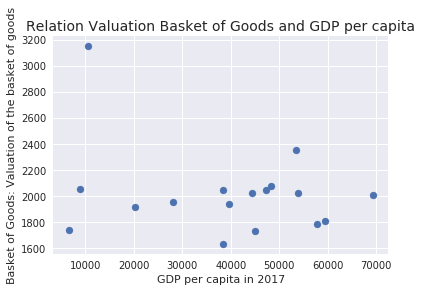

In [150]:
# Merge dataframes
df_merge_basketgoods_GDPpc = pd.merge(df_GDPpc, df_merge_basket_of_goods, on=['Country Name'], how='inner')

# Show relation graphically
plt.title('Relation Valuation Basket of Goods and GDP per capita', fontsize=14)
plt.scatter( df_merge_basketgoods_GDPpc['2017'], df_merge_basketgoods_GDPpc['Value Basket of Goods'])
plt.ylabel('Basket of Goods: Valuation of the basket of goods')
plt.xlabel('GDP per capita in 2017')
plt.show()

In the graph above, one can still see a positive relationship, but not that strong anymore. This means that a higher GDP in 2017 has got less effect on the value of the basket of goods.

Lastly, we will plot the relationship between the valuation of the currencies in the Big Mac Index and those of the basket of goods. Normally one would expect that an overvaluation of the Big Mac Index also leads to an overvaluation of the Basket of goods. This is, because the Big Mac Index is seen as an important tool to compare purchasing power. 

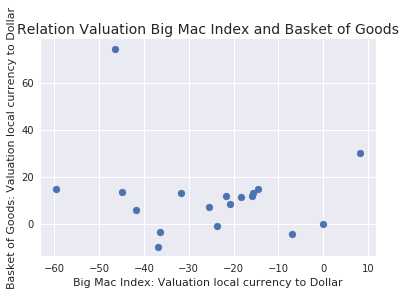

In [143]:
# Merge dataframes
df_merge_basketgoods_BigMac_valuations = pd.merge(df_merge_exchangerate_bigmac, df_merge_basket_of_goods, on=['Country Name'], how='inner')

# Show relation graphically
plt.title('Relation Valuation Big Mac Index and Basket of Goods', fontsize=14)
plt.scatter( df_merge_basketgoods_BigMac_valuations['Over-/undervaluation Big Mac_x'], df_merge_basketgoods_BigMac_valuations['Over-/undervaluation Basket of Goods'])
plt.ylabel('Basket of Goods: Valuation local currency to Dollar')
plt.xlabel('Big Mac Index: Valuation local currency to Dollar')
plt.show()

Contrary to the expectations there is almost no relationship between the valuation of the Big Mac index and the valuation of the basket of goods, which can be seen in the graph above. This implies that a change in one of the variables does not affect the other variables. 

## Results
Below each research question will be answered shortly.

**Based on the Big Mac Index, how are several currencies valued compared to the American Dollar?** 
As can be seen in this table, most currencies are undervalued to the US Dollar. This means that these currencies are traded for less than their instrintic value. There are only 2 countries, Switzerland and Sweden, who did have a overvaluation relative to the USD. The results suggests that the US Dollar is overvalued to most currencies. This may be due to the strong power the US Dollar has globally.

**Sensitivity Analysis: In which way does the alternative Big Mac Index, adding average wage as component, differs         from the 'normal' Big Mac Index?**
The picture changes with adding average wage as a sensitivity analysis. With the sensitivity analysis, the potential maximum amount of buying Big Macs is calculated. In this way, income per head becomes an element in the purchasing power. We find here  that most countries are not able to buy the same amount of Big Macs; they earn less Big Macs per hour. This is contrary to the findings at the original Big Mac Index, in which a negative outcome (=undervaluation) suggests one is able to buy a Big Mac cheaper in one currency than in the USD. We found a positive relation between the alternative and original Big Mac Index, implying that a higher valuation to the USD in the original Big Mac Index leads to an increase in buying more Big Macs, or vice versa. This sounds contrarian, but we found out that GDP per capita may contribute heavily to the positive relationship of the Original and Alternative Big Mac Index.

**Choosing other goods for creating an index, how does these indexes differ from the Big Mac Index?**
In this table the valuations per good for every currency are given. Above these tables, each product is discussed and reviewed seperately. To be precise, there is a wide variation across the several valuations both within and across the products. None are exactly consistent to the Big Mac Index. There are many differences that can be seen and the not-weighted mean mainly shows that, in most cases, the USD dollar is overvalued to the other currencies, which is in line with the Big Mac Index. The fact that the Big Mac Index is not similar to one of the other indexes could imply that either the Big Mac Index or the other applications do not show the exact purchasing power. 

**Bundling all goods, does this basket of goods differs from the Big Mac Index?**
Bundling all goods results, in most cases, in an overvalution of the currencies, which can be seen in this section. This implies that someone using the American Dollar can buy less in the United States than another person living in another country, using an other currency. This is the opposite of the outcome given by the Big Mac Index. We do find a small positive relation between the valuation of the basket of goods and GDP per capita in 2017, but less strong than the relation was between the Alternative Big Mac Price and the GDP per capita in 2017. There is almost no relation between the valuation of the basket of goods and Big Mac Index. This implies that a change in one of the variables does not affect the other variables. An overvaluation of the Big Mac does not mean directly in an overvaluation of the basket of good. This implies that either (both) the basket of goods or (and) the Big Mac Index are not good indicators for the purchasing power in a particular currency.



## Conclusion
As most answers are already well-described in Results, this section will be rather short. In this research we researched several issues regarding the Big Mac Index. The Big Mac Index suggests that the US Dollar is overvalued to most currencies, maybe due to the strong position the US Dollar has. Adding average wage to create an alternative Big Mac Index results in opposite outcomes. We found a positive relation between the alternative and original Big Mac Index, implying that a higher valuation to the USD in the original Big Mac Index leads to an increase in buying more Big Macs, or vice versa. This may be due the interference of the GDP per capita.
Other Application Indexes are reviewed whether they are good indicators for purchasing power. There is a wide variation across the several valuations both within and across the products. None are exactly consistent to the Big Mac Index. In most applications, the USD dollar is overvalued to the other currencies. Bundling all these goods, often results in an overvaluation of the currencties relative to the USD. This is the opposite of the outcome given by the Big Mac Index. There is almost no relation between the valuation of the basket of goods and Big Mac Index. This implies that either (both) the basket of goods or (and) the Big Mac Index are not good indicators for the purchasing power in a particular currency.
Further research is needed to improve the relability of the results. The basket of goods may include more products to get a more precise view about the purchasing power parity. Also, a better review of the variations used may be needed. In our research some variations do not met both criteria. Most variations are also foodproducts; adding some non-foodproducts could make the outcomes more reliable.